In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = tf.keras.models.load_model('handwriting_model.h5', custom_objects={"softmax_v2": tf.nn.softmax})

In [3]:
def _get_base_url(dataURL: str) -> str:
    return dataURL[dataURL.find(',') + 1:].replace('+', '-').replace('/', '_')


def _format_image(image_tensor):
    # TODO: Find out types
    cropped_image = tf.image.resize(image_tensor,
                                    [28, 28],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR,
                                    preserve_aspect_ratio=True,
                                    antialias=True,
                                    name=None
                                    )
#     cropped_image = tf.image.resize_with_crop_or_pad(image_tensor, 28, 28)
    plt.imshow(cropped_image, cmap='Greys')
    grayscale_image = tf.image.rgb_to_grayscale(cropped_image)
    return grayscale_image

In [4]:
image = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAdkAAAHZCAYAAADKR0ECAAAgAElEQVR4Xu3dX5LVNsI3YJs+XE+ygjArCFlBSLVPVe7CrCBkBSErCFlByApCVhC4o+r4VJoVDLOCISsYuOZ0+yv15+btEP7Y3ZYs2U9XUWQmtiw9UvghW5bryg8BAgQIECAQRaCOUqpCCRAgQIAAgUrIGgQECBAgQCCSgJCNBKtYAgQIECAgZI0BAgQIECAQSUDIRoJVLAECBAgQELLGAAECBAgQiCQgZCPBKpYAAQIECAhZY4AAAQIECEQSELKRYBVLgAABAgSErDFAgAABAgQiCQjZSLCKJUCAAAECQtYYIECAAAECkQSEbCRYxRIgQIAAASFrDBAgQIAAgUgCQjYSrGIJECBAgICQNQYIECBAgEAkASEbCVaxBAgQIEBAyBoDBAgQIEAgkoCQjQSrWAIECBAgIGSNAQIECBAgEElAyEaCVSwBAgQIEBCyxgABAgQIEIgkIGQjwSqWAAECBAgIWWOAAAECBAhEEhCykWAVS4AAAQIEhKwxQIAAAQIEIgkI2UiwiiVAgAABAkLWGCBAgAABApEEhGwkWMUSIECAAAEhawwQIECAAIFIAkI2EqxiCRAgQICAkDUGCBAgQIBAJAEhGwlWsQQIECBAQMgaAwQIECBAIJKAkI0Eq1gCBAgQICBkjQECBAgQIBBJQMhGglUsAQIECBAQssYAAQIECBCIJCBkI8EqlgABAgQICFljgAABAgQIRBIQspFgFUuAAAECBISsMUCAAAECBCIJCNlIsIolQIAAAQJC1hggQIAAAQKRBIRsJFjFEiBAgAABIWsMECBAgACBSAJCNhKsYgkQIECAgJA1BggQIECAQCQBIRsJVrEECBAgQEDIGgMECBAgQCCSgJCNBKtYAgQIECAgZI0BAgQIECAQSUDIRoJVLAECBAgQELLGAAECBAgQiCQgZCPBKpYAAQIECAhZY4AAAQIECEQSELKRYBVLgAABAgSErDFAgAABAgQiCQjZSLCKJUCAAAECQtYYIECAAAECkQSEbCRYxRIgQIAAASFrDBAgQIAAgUgCQjYSrGIJECBAgICQNQYIECBAgEAkASEbCVaxBAgQIEBAyBoDBAgQIEAgkoCQjQSrWAIECBAgIGSNAQIECBAgEElAyEaCVSwBAgQIEBCyxgABAgQIEIgkIGQjwSqWAAECBAgIWWOAAAECBAhEEhCykWAVS4AAAQIEhKwxQIAAAQIEIgkI2UiwiiVAgAABAkLWGCBAgAABApEEhGwkWMUSIECAAAEhawwQIECAAIFIAkI2EqxiCRAgQICAkDUGCBAgQIBAJAEhGwlWsQTWIvD111/fOj09/exD7T07O7tV1/WtmCZ1XZ9clL/b7Z7FvJayCQwVELJDpRxHYKECd+7c+eTmzZufh+a9FYafVFV1+6LZXddFD8opibuue1HX9Yuqqk7CP9+8efPZ06dPw//2QyCZgJBNRu1CBOYR2G63ISj/0XXdnb4GF7+H/z8E6Zp+XlZV9TwEb5j5mvGuqevnaauQncfdVQlMLrDdbr+8NBO9U9rMc3KQ4QU+7rru8enp6ZOTk5MQwn4ITCYgZCejVBCBdAIhUMOt3LOzs9t1XYcZ6ZvbuulqscgrPe+67uF+v/9tka3TqOQCQjY5uQsSGCcQFhYdDofwzDTc5g2/BOo4wtFHh2e4VVU9MLsdTeeEtwSErCFBIDOBsBDp6Ojom4tQjb0qN7Pm51adl3VdP9jtdr/kVjH1KUNAyJbRT2q5cIFw+7frurtmqtl29PO6rr/b7XZh0ZQfAoMFhOxgKgcSmE4g3AJ+/fr1l3VdXwTr2lb5ToeZtqQHh8PhFwuk0qKXfDUhW3LvqXtRAmarRXXXhyprVruYrozfECEb39gVVipw8WzVbHWRA+Bl13Xf7ff7x4tsnUZNJiBkJ6NUEIGq6rcY/KbruntWAa9iRDxs2/aHVbRUI68kIGSvxOYkAv8ncBGsZ2dn960EXuXIeH44HL7ynHaVff/RRgvZjxI5gMDfBfr9fr81YzU6eoHwqs9XVh8bD28LCFljgsAIgaZpwvur4VZwWBXsh8BlgRC0P+x2u0dYCFwICFljgcBHBPodl77vw9WrNkbMxwQetG3708cO8u/XISBk19HPWjlS4NLK4DBrvfhqzchSHL5Wga7rHu33++/W2n7t/j8BIWs0ELgk0G8S8WP/2o1Zq9FxZQFBe2W6RZ0oZBfVnRpzVYHj4+Nv67o2a70qoPPeKSBoDQwhawysVqB/1vptVVX3V/jx8tX2e+qGC9rU4nldT8jm1R9qk0CgaZrwQfOLmWuCK7rE2gW6rvtlv9+Hv8z5WZmAkF1Zh6+5uf0t4fAHne+xrnkgzNT2/is+Xu+ZyX+uywrZueRdN4lAWCW82WzC6zduCScRd5GPCHzVtu0JpfUICNn19PWqWnpplXBYzOSHQC4CLw+Hwz9twZhLd8Svh5CNb+wKCQWEa0Lsv17q2Ueu/LKqqpgfPA+PAMIrV1/OJjD8wo/btv3X8MMdWbKAkC2599T9jYBwnWQwnAdlXdcvuq570Zf4l3As4VZnPxZu13UdgjdsJJJj8P7Qtu3DSXpNIVkLCNmsu0flPibQ78z0c/+O68cOX/u/DyF6HpoXQbrZbF48ffr0IlAX69OvKL/bbzLyWQYNfbnZbL5Yg30G1rNWQcjOyu/i1xFomuZHC5r+Lth13X9CiPa3Z0/WEqRDx9J2u73XdV2YRf5j6DmRjjtp2/arSGUrNhMBIZtJR6jGcIF+VvKrb7eem/15Eabh9xJu5w7v6XhH9qvOw+s04atKc/64bTynfoJrC9kEyC4xjUD/B+OvK//M3J91XYdXQE6Ojo5O3G683tjKYFZrtfH1ujD7s4Vs9l2kgkHg+Pg4PE8LAbvGTfufhFDdbDaPher0/z1st9vbZ2dnj+q6/nz60j9eYl3Xv+12O6+afZyqyCOEbJHdtp5Kr3T2+mfXdY9DsO73+/C7n8gCc98+ruv6i91uF/MVp8iCin+fgJA1NrIV2G6333dd92Als1ez1QxG4vHx8cO6rsMOYal/LIJKLZ7oekI2EbTLDBdYyezVbHX4kEh6ZP+cNjyaSPpjb+Ok3MkuJmSTUbvQEIElP3vtX60Jz/5O3BocMhrmO2aOoA0bgOz3+3/O12pXjiEgZGOoKnO0wII3lQiv2Dy0aGn0kJj9hLAgquu6sJI72fu0Xdf9y3P42bt+0goI2Uk5FXYVgf7j6b8v6BN0r8KHum/cuPHIjPUqIyKfc2aY0Xo2m0/3T1ITITsJo0KuKtA/f/1jIQH7JISrmchVR0Oe5zVNEz6T+HPC2vkcXkLs2JcSsrGFlf9egYUEbLgd/Giz2TzyDutyB3vTNOG2caoPDZjNLmgoCdkFdWZpTdlut4+6rvu2tHqH+oYNBMKs1TaGJfbe+Dr3jzTCe6xJns9uNpt/+kvb+H7K8Qwhm2OvrKBOYf/hqqrCbeKSfsxaS+qtieua8vls13W/7Pf7cJvaT+ECQrbwDiy1+oXNYp+Fr7Z41lrqaJuu3glvG79s2/bT6WqupLkEhOxc8iu+bv8s9n+ZE7yq6/rx0dHRA7ftMu+phNXrX+v5d4pLep0nhXL8awjZ+Mau8JZA5reKz99rPRwOj05OTsIHzv0Q+ItAwq0Xn7Rtexd/2QJCtuz+K7L2M7wSMcTJLeEhSo6p+jsxL1IsgjocDp/6y17Zg07Ilt1/Rda+aZqw6f+POVTeKuEceqG8OqQaw/YzLm9svF1jIVt+HxbXglR/QH0IJoSr563FDZ1sKpxwNuuWcTa9frWKCNmruTnrGgIz3y5+ttls7lnMdI0OdOq5QKq/LLplXPaAE7Jl91+RtZ9p4VP4tNx9r+EUOWSyrHSqVfJuGWfZ/YMrJWQHUzlwSoGmabopy/tIWT8dDoeHFpAkFF/JpZqmeVxV1Tcxmxsebex2u3sxr6HseAJCNp6tkj8gkGIzivD91hs3btzzJRxDMZZA//3j8AWpmD82poipG7lsIRsZWPHvFuj3gv1vRJ+f2rYNq5j9EIgq0DRNeJ869p7GvswTtRfjFS5k49kq+SMCMRaOmL0adqkFEm1O4S+NqTt2ousJ2YkgFXM1gePj4+d1XX9+tbP/dpY/iCaCVMxwgURbLT5v2/aL4bVyZC4CQjaXnlhpPcIKzaOjo5PrBK3Z60oHT0bNTnHL2Ks8GXX4iKoI2RFYDo0j0L8K8eiKqzStHI7TLUodIZBoId+/vII2olMyOVTIZtIRqlFV/UrNh1VVfTbAw6YSA5AckkYgxSpjr/Kk6cupryJkpxZV3rUF+s0qwkfdw69bfeg+q+v6Rdd14Rnuiddyrs2sgIkFErz77bnsxH2Wojghm0LZNQgQWLxAio0pPJctbxgJ2fL6TI0JEMhQIMWe3D7knmHHf6RKQra8PlNjAgQyFEjxKk/Xdb/s9/v7GTZfld4jIGQNDQIECEwkkOBVnmdt24a1Cn4KERCyhXSUahIgkL9Aild52rb153b+Q+FNDXVWQZ2lqgQI5C2w3W7vdV33a+Ra2sc4MvCUxQvZKTWVRYDAqgVSPJetquqHtm3D++R+ChAQsgV0kioSIFCOQOznsjalKGcshJoK2bL6S20JEMhcIMH7sjalyHwMXK6ekC2os1SVAIH8BVK8L2vxU/7j4KKGQracvlJTAgQKEOi3Bf0jclUtfooMPFXxQnYqSeUQIECgF0iwj7HFT4WMNiFbSEepJgEC5QgcHx+HD1l8HqvGFj/Fkp2+XCE7vakSCRBYuUCCTSns/FTIGBOyhXSUahIgUI5AgsVPL9u2/bQckfXWVMiut++1nACBSAIpFj9ZYRyp8yYuVshODKo4AgQIBIEEi5+sMC5gqAnZAjpJFQkQKE8g9s5Pvi1bxpgQsmX0k1oSIFCYQNM0J1VVfRmx2j+1bfsgYvmKnkBAyE6AqAgCBAi8LZBghbGQLWDYCdkCOkkVCRAoT6BpmjDL/DFizb3GExF3qqKF7FSSyiFAgMAlgePj47t1Xf8eEUXIRsSdqmghO5WkcggQIHBJIMFrPL7GU8CIE7IFdJIqEiBQnkCKD7h7Vzb/cSFk8+8jNSRAoFCB2O/KCtn8B4aQzb+P1JAAgUIFhGyhHTdhtYXshJiKIkCAwGWB2BtSVFVl16fMh5yQzbyDVI8AgXIFEmxIIWQzHx5CNvMOUj0CBMoVELLl9t1UNReyU0kqhwABAm8JxA5Z+xfnP+SEbP59pIYECBQqYGvFQjtuwmoL2QkxFUWAAIHLAgm2VrR/ceZDTshm3kGqR4BAuQJCtty+m6rmQnYqSeUQIEDg789kY38kwEw281EnZDPvINUjQKBcgdgz2bquf9vtdvfKFVp+zYXs8vtYCwkQmEnAl3hmgs/oskI2o85QFQIEliWQ4Es8PneX+ZARspl3kOoRIFCugJAtt++mqrmQnUpSOQQIEHhLQMgaEkLWGCBAgEAkASEbCbagYoVsQZ2lqgQIlCWQIGSft237RVkq66qtkF1Xf2stAQIJBe7cufPJZrP5X8xL+nB7TN3rly1kr2+oBAIECLxXwIfb1z04hOy6+1/rCRCILCBkIwNnXryQzbyDVI8AgbIFhGzZ/Xfd2gvZ6wo6nwABAh8QELLrHh5Cdt39r/UECEQWELKRgTMvXshm3kGqR4BA2QJCtuz+u27thex1BZ1PgAABt4uNgfcICFlDgwABAhEFzGQj4hZQtJAtoJNUkQCBcgWEbLl9N0XNhewUisogQIDAewSE7LqHhpBdd/9rPQECkQWEbGTgzIsXspl3kOoRIFC2gJAtu/+uW3she11B5xMgQOA9Atvt9nbXdf+OCPRn27a3Ipav6GsKCNlrAjqdAAEC7xNI8Km7Z23b3tED+QoI2Xz7Rs0IEChcQMgW3oETVF/IToCoCAIECLxLoGma+1VV/RxRx0w2Iu4URQvZKRSVQYAAgXcINE3zoKqqH2Ph1HX92263uxerfOVeX0DIXt9QCQQIEHinwHa7fdR13bcReX5q2zYEuZ9MBYRsph2jWgQIlC/QNM1JVVVfRmzJD23bPoxYvqKvKSBkrwnodAIECLxPIPY7slVVfdW2bQhyP5kKCNlMO0a1CBAoWyDBO7JVXddf7Ha752VLLbv2QnbZ/at1BAjMJLDdbu91XfdrzMu3bevP8JjAE5StgyZAVAQBAgTeFjg+Pn5Y1/X3EWVetW37ScTyFT2BgJCdAFERBAgQeFugaZqwneLtiDJP2ra9G7F8RU8gIGQnQFQEAQIELgvcuXPnk81m87/IKl7fiQw8RfFCdgpFZRAgQOCSwPHx8d26rn+PjGJlcWTgKYoXslMoKoMAAQJ/DdnYz2Orw+Hw6cnJyUvweQsI2bz7R+0IEChQIMHzWJ+4K2RcCNlCOko1CRAoQyDR81iLnsoYDpWQLaSjVJMAgTIEUrwfW1WV7RTLGA5CtpB+Uk0CBAoRSPBRADs9FTIWQjXNZAvqLFUlQCB/gaZpwqs7MTeJsAlF/sPgTQ2FbEGdpaoECOQt0DTNnaqq/ohcS89jIwNPWbyQnVJTWQQIrFogwVaKwdfz2IJGmZAtqLNUlQCBvAWOj4//W9f1rZi13Gw2/3z69OmLmNdQ9nQCQnY6SyURILBigRSftquqyvuxhY0xIVtYh6kuAQJ5CqS4VVzX9W+73e5engJq9S4BIWtcECBAYAKBFLeKu677136/fzxBdRWRSEDIJoJ2GQIEliuQ6FZx5SPt5Y0hIVten6kxAQKZCaS4VVxVlVd3Muv3IdURskOUHEOAAIEPCCTYgCJc3as7BY5CIVtgp6kyAQL5CCTaq7jy6k4+fT6mJkJ2jJZjCRAg8JZA0zRhIdI3MWG6rvvPfr+/HfMayo4jIGTjuCqVAIEVCHz99de3DofDfxM01a3iBMgxLiFkY6gqkwCBVQg0TfOgqqofYzfWreLYwvHKF7LxbJVMgMCCBfqPs4dZbMwv7lRuFZc9iIRs2f2n9gQIzCSQasGTVcUzdfBElxWyE0EqhgCBdQmk2OEpiB4Oh09PTk5erkt3Oa0VssvpSy0hQCCRQKLvxobW2IAiUZ/GuoyQjSWrXAIEFivQNE34MHv4QHvUH3sVR+VNUriQTcLsIgQILEUg4SzWZ+0WMGiE7AI6URMIEEgnkHAW+8t+v7+frmWuFENAyMZQVSYBAosUSDiLtY3iQkaQkF1IR2oGAQLxBVLNYquqeta2bfRnvvHFXEHIGgMECBAYIJByFmvB04AOKeQQIVtIR6kmAQLzCqR6L7aqKgue5u3qSa8uZCflVBgBAksUSLi7U1XX9Xe73e7REh3X2CYhu8Ze12YCBAYLhD2Kj46O/l3X9a3BJ139wFeHw+GWHZ6uDpjbmUI2tx5RHwIEshJI9aWdvtE/tW0bvuzjZyECQnYhHakZBAhML9B/L/bfsb+009fcLHb6Lpy9RCE7exeoAAECuQo0TfN7VVV3E9XPLDYRdMrLCNmU2q5FgEAxAilf2QkoPsxezNAYVVEhO4rLwQQIrEUg4Ss7YUXxb7vd7t5abNfUTiG7pt7WVgIEBgkkXuxkFjuoV8o8SMiW2W9qTYBAJIHEi53MYiP1Yy7FCtlcekI9CBDIQiDh/sShvVYUZ9Hr8SohZOPZKpkAgcIEmqYJn5b7OWG1rShOiD3HpYTsHOquSYBAdgKpbxObxWY3BKJUSMhGYVUoAQKlCSS+TWyP4tIGyBXrK2SvCOc0AgSWIzDDbWJf2lnO8PlgS4TsSjpaMwkQeLfAdru93XXdH4m2TjyvhO/Frmc0Ctn19LWWEiDwlkD4ws5mswkBezshzrO2be8kvJ5LzSggZGfEd2kCBOYVOD4+/rWu66Q7Ldk+cd4+T311IZta3PUIEMhCIOWH2C812Cs7WfR+ukoI2XTWrkSAQCYCczyHrarqz8PhcNsH2TMZBImqIWQTQbsMAQJ5CMz0HNZipzy6P3kthGxychckQGBOgcTfiL1oqsVOc3b6jNcWsjPiuzQBAmkFZngfNjTw1Wazuf306dMXaVvrajkICNkcekEdCBCILpD6I+yXGvRD27YPozfQBbIUELJZdotKESAwpcAM+xK7TTxlBxZclpAtuPNUnQCBjwvMtdDJbeKP980ajhCya+hlbSSwYoHUG/+7TbziwfaOpgtZ44EAgcUKzLGjU49pNfFiR9W4hgnZcV6OJkCgEIGZVhIHHauJCxkjKaopZFMouwYBAkkFZtoy8byNvrCTtKuzv5iQzb6LVJAAgTEC/ZaJ/x5zzlTH1nX92263S/rBganqrpw4AkI2jqtSCRCYQWCmPYkvZrD/OT09vWNv4hk6PuNLCtmMO0fVCBAYLjBnwIbnsHVd39ntds+H19iRaxAQsmvoZW0ksHCBmQO2quv6u91u92jhzJp3BQEhewU0pxAgkI9ABgHrOWw+wyG7mgjZ7LpEhQgQGCowd8B2Xec57NDOWulxQnalHa/ZBEoXmDtgvQ9b+ghKU38hm8bZVQgQmFCg/6LO71VVfTJhsWOL+qpt25OxJzl+XQJCdl39rbUEiheYc6OJS3g+X1f8SErTACGbxtlVCBCYQCCHgLXhxAQduaIihOyKOltTCZQs0DTNj1VVPZizDRY6zalf5rWFbJn9ptYEViUw49d0Lju/OhwOt+zotKqhd+3GCtlrEyqAAIFYAv0H18MCpzuxrjGwXDs6DYRy2F8FhKwRQYBAlgJ9wP5RVdXtuSvoyzpz90C51xey5fadmhNYrEB4B/bs7Oz3uq5vZdBIK4kz6IRSqyBkS+059SawUIHj4+O7dV3/OvM7sOe6VhIvdJAlbJaQTYjtUgQIfFhgu91+33XdwxycBGwOvVB+HYRs+X2oBQQWIZDJCmIz2EWMpnwaIWTz6Qs1IbBKgZwWOIUOCO/C7vf72RdbrXIwLLDRQnaBnapJBEoRyGyB03nAnp6e3vEubCkjKP96Ctn8+0gNCSxSIIctEi/DCthFDrPZGyVkZ+8CFSCwPoGcnr9e3CI2g13fOEzRYiGbQtk1CBA4F/j6669vHQ6HsINTNs88zWANzpgCQjamrrIJEHgjkNP7r5e65dnhcLjrGayBGktAyMaSVS4BAucC/erh8AWd+zmReA82p95Ybl2E7HL7VssIzC4QVg93XRd2b8rm9nBAEbCzD43VVEDIrqarNZRAWoF+9fDPOWyPeLnlAjbtOFj71YTs2kfAitofZlVVVf2jb3KYYX1yqfnh313+3+Gfx8y+XlZV9fwtzvC/w/8fZk6X//2r3W739rGL6Yn+9nCYvd7NsFE/tW0764ffMzRRpYgCQjYirqLTCYRVq6enp5+FYOzD8/z7o13X3crkSy7vwzjp/8X573Vdh9+LDeFMFzedE9d1/d1ut3uUblS6EoGqErJGQVEC2+32yz5IwyfQQqDmHqLX8T3puu5FXdfh18nr16//k+sq2Mxnr6/CrLpt24u/0FynT5xLYJSAkB3F5eCUAheBenZ2druu63Drdszt25RVTXmtcNv5pJ/xPsvhtnPOs9dwV6Cu6zs5OKUcJK6Vj4CQzacvVl2TcLv39evXYZZ6R6COHgphhnYevLvd7tnos694Qr+xRFjYlOOz1/N9iG/evHn36dOnL67YRKcRuLaAkL02oQKuInA5VPtgDbd//UwjcBG6T2LN4JqmuXjv9fJisWlqP00pNpmYxlEp1xQQstcEdPpwgXD7t+u6u+FX5ouRhjcq/yPf3F4+Ojp6ct1ZXdM0YUFZmL1me+veKzr5D8o11VDIrqm3Z2hr+EO567pv67oOtxRznfXMIDPPJfuFVI/D7eXD4fBs6EKqsLDp6Ojo57qu781T88FX/aFt24eDj3YggcgCQjYy8BqL75/Vfdt13T0z1uxHQHiWG0L3vYuoCrg1HJBfhfG23+9DW/wQyEZAyGbTFeVXpH/O+mMBs53ysSO04PIst23bJ2HVcLg1XMBflP4Md0piPX+OQK3IFQkI2RV1dqym9u9Ift9vAO+WcCxo5b5LwAIn4yJrASGbdffkX7lcN4DPX04NryvQdd0v+/0+qy/7XLdNzl+egJBdXp8ma1H/rM4+sMnEXagXCBtM3LdFovFQgoCQLaGXMqtjv7Dp95xf48iMTHUmEggbTNy4ceOe568TgSomuoCQjU68rAv0t4f/8DrOsvq1kNY8ORwO94a+dlRIm1Rz4QJCduEdPGXz+o0IwgzW4qYpYZU1RMD7r0OUHJOdgJDNrkvyrFD/Ae7wjVA/BFIKeD0npbZrTS4gZCcnXV6B/Qw23CL2QyCZQNge8fXr1/fdHk5G7kIRBIRsBNQlFekZ7JJ6s5i2WD1cTFep6McEhOzHhFb87/tNJsIMNtvN4FfcPYtsus/TLbJbV90oIbvq7v9w45umCYucsvxWqG5bpMBPbdt673qRXbveRgnZ9fb9B1vuOayBkVqg67pHN27c+MU7sKnlXS+mgJCNqVtw2cfHx/8tYGP4goVV/QMC4aPzYVYbfvdDoGgBIVt098WpfNM04Zbdj3FKVyqBwQIhZB+GLwINPsOBBDITELKZdUgO1Wma5n9L3XAiLKyp6/plcO667vnFP/fuf5k5HQ6H50NfH+lXYb/ZpCPcBei67tal/rzT/3P4/z7LoZ9LqUP4BF9VVQ/2+/1vpdRZPQlcCAhZY+EvAgvYdOJZVVUhREOAvgh/QG82mxdPnz4Nf1Bn89Pv/3zrUhiHEP4ymwpmWBFhm2GnqNJHBYTsR4nWdUDTNI+rqvqmgFb/GYK0/3UyZtaZS9vC7DcEa9d1YQX3xUw3l+rlXI/wl6iHh8Phl6F3GnJujLotW0DILrt/R7Wun139d9RJaQ4uPlAvmJqmCX+BuROC1cKyaw8eYXttQgXEFhCysYULKr9pmvAB7J/nrnJ4blpVVXg+enJ6enpS8mwl/MXl9evXX9Z1HWar3lkJFu8AAAypSURBVDmONLjC6z83b978KbfHApGaq9iCBIRsQZ0Vu6rHx8cP67r+PvZ13lF+2Ebv8dnZ2ePSQzW0bbvdXr4FbLeshAMqhG3Y89jrPwnRXeqDAkLWAHkj0DRNmD2mXHzzrOu6h/v9PjwHLvanD9XwTPXiV7FtWVDFvWu7oM4suSlCtuTem7juCV/dCc9Y75U42wiLlc7Ozj4PgVrXdZilmqlOPA6nLM6K5Ck1lXUVASF7FbWFntM0TRe7aeEPvdPT0y9yf84anqWenp5+1nVdWKQUXrURqLEHR8Tyw7ir6/qRFckRkRX9TgEha2Bcvl0cPWTDxXL4A+8iRPv6XLw+E34PG0qYnS73v4uXXdc9tkhquR2cW8uEbG49MmN9Usxk39G88K7rSdg4on/ntTo6OvrzfatEw+f3bt68GW7X/u2n67p3BWQIzIudmATojOMrw0uHtQC/lPjYIkNLVXqPgJA1NC7PZMN7h/9AQmBlAs/7BXi2bVxZx6dorpBNoVzINWZYXVyIzGqr+Wdd1w/6PZjvrWDPZZtbrHaox2u4kI1nW1zJM74nW5zVwit8Hq673e7R5XaGbwzXdX2v67pvF97+sG7At22X3smJ2idkE0GXcJnj4+Ow1d/vJdRVHaMIvDNc375Sv/1mmNmuYXbrfdsoQ209hQrZ9fT1oJY2TRMWIPkU2yCtZRwUtrG8cePGw7dnrkNa1//FLGzHmXITkyFVm/oYz22nFl1JeUJ2JR09tJm57F88tL6Ou7pA2H4w3BadYnVt/0pUeH4b9mde7OK58PpZ+AvJ69evf8v9Xe+rjwxnTikgZKfUXEBZ4RWZ8P3VJf9BuYBuuk4TXoXPxG02m0cxNtPvx0+4jRxmt0u+I+J92+uMwhWdK2RX1NlDm2o2O1SqqOOehR2PrnJL+KqtXNGtZO/bXnWQrOA8IbuCTr5KE73OcxW17M551X8C7mGMWevQ1vYfp7+/glXJ589tT09Pn7iVPHR0LP84Ibv8Pr5SC/sVpGE3psU+X7sSTBknJZ+1DmHpv617P7wGtPBxFd63Pf/k3m63C/8N+VmxgJBdced/rOnb7Ta8E/nrx47z77MQ+LPfk3fWWesQif65bXhmG34t+i9x/T7d4XbySdu2T4b4OGZZAkJ2Wf05eWu22+2jFdzmm9wtUYFvPnZf4jd5L4XtGt63ffNhjLZtf0o0PlwmAwEhm0En5F6F4+Pj53Vdv3NT/tzrvsD6hdXB4YMKj1MuYort2N81ebDwFckXjOG/p+/cSo49qvIoX8jm0Q9Z1yLMOI6OjsIf7IJ2np4KOzGdnJ2dPS5xxjqGbEVh+7Ku668E7ZjRUeaxQrbMfkte6/4Tcw/dOk5DH3ZhCrPVfsa6usUzYZ/kqqrCzHbJO0kJ2jT/Oc16FSE7K395F/cRgWh99uY28OvXrx97BeT/O/dhGxZIfRNNft6Cn7dt+8W8VXD1mAJCNqbuQsvuNxkIX2hZ9MrQBN13viI4PGNd+m3g61pe2rZxiV8A+qlt2zBr97NAASG7wE5N0aR+ZWgI2qXOMGIwns9Ww6/NZvN4zg0iYjQuRZmXvgC0mNd/wms++/3+nyn8XCO9gJBNb76oK/az2ocrWRV6lb57dhGsU2zEf5UKLPGcpe2R3HXdv9zNWOJIrSohu8x+Td6qFa0K/ZDtn1VVhUVKYbYanrWF3/1EFujHXnjXtthFUl3X/bLf78Ps3M/CBITswjp07uYs4Q+8IYb96t/wtaLzUD0cDs8tVhoiF++YsEgqbNlY6Ar4Z23bhhXVfhYmIGQX1qG5NCdsCn92dnavruvwfdFiP3nWh2nYiza8J/wiPD8zQ81llL27HoXukSxk8x5WV66dkL0ynROHCoTA7bou/C09/LqdUeiGhUjn76B2XRd24QnvLZ4HafimroVJQ3s4z+MKe277sm3bT/OUVKvrCAjZ6+g590oC/R9+t+u6vtV13a2L3/uw+2TAzlJhMdE7fy7C8tK/DLPQN5s5CM8rdVnxJxXwGMNMtvhR9u4GCNmFdqxmESDwd4Fcv23bfxYvLN7yszABIbuwDtUcAgQ+LpDb+7b9BwPCe+d+FiYgZBfWoZpDgMBwgVy+bXs4HD61On14v5V0pJAtqbfUlQCBaALhue3Z2dn9AWsCJq2DW8WTcmZXmJDNrktUiACBOQUSv2/76nA43DKLnbPH415byMb1VToBAoUKXPooQXjXO8rHMDyLLXRwjKi2kB2B5VACBNYnEOt9WwG7jrEkZNfRz1pJgMAEAhN93/ZVXdf3d7ud1cQT9EnuRQjZ3HtI/QgQyE7gYnbbdV3YOvTzERV8stls7ttNbIRY4YcK2cI7UPUJEJhXoH92e75taL996F/26g77X4e9r2/evPlQuM7bV3NcXcjOoe6aBAgsWiDsLPX69esXVg0vupsHNU7IDmJyEAECBAgQGC8gZMebOYMAAQIECAwSELKDmBxEgAABAgTGCwjZ8WbOIECAAAECgwSE7CAmBxEgQIAAgfECQna8mTMIECBAgMAgASE7iMlBBAgQIEBgvICQHW/mDAIECBAgMEhAyA5ichABAgQIEBgvIGTHmzmDAAECBAgMEhCyg5gcRIAAAQIExgsI2fFmziBAgAABAoMEhOwgJgcRIECAAIHxAkJ2vJkzCBAgQIDAIAEhO4jJQQQIECBAYLyAkB1v5gwCBAgQIDBIQMgOYnIQAQIECBAYLyBkx5s5gwABAgQIDBIQsoOYHESAAAECBMYLCNnxZs4gQIAAAQKDBITsICYHESBAgACB8QJCdryZMwgQIECAwCABITuIyUEECBAgQGC8gJAdb+YMAgQIECAwSEDIDmJyEAECBAgQGC8gZMebOYMAAQIECAwSELKDmBxEgAABAgTGCwjZ8WbOIECAAAECgwSE7CAmBxEgQIAAgfECQna8mTMIECBAgMAgASE7iMlBBAgQIEBgvICQHW/mDAIECBAgMEhAyA5ichABAgQIEBgvIGTHmzmDAAECBAgMEhCyg5gcRIAAAQIExgsI2fFmziBAgAABAoMEhOwgJgcRIECAAIHxAkJ2vJkzCBAgQIDAIAEhO4jJQQQIECBAYLyAkB1v5gwCBAgQIDBIQMgOYnIQAQIECBAYLyBkx5s5gwABAgQIDBIQsoOYHESAAAECBMYLCNnxZs4gQIAAAQKDBITsICYHESBAgACB8QJCdryZMwgQIECAwCABITuIyUEECBAgQGC8gJAdb+YMAgQIECAwSEDIDmJyEAECBAgQGC8gZMebOYMAAQIECAwSELKDmBxEgAABAgTGCwjZ8WbOIECAAAECgwSE7CAmBxEgQIAAgfECQna8mTMIECBAgMAgASE7iMlBBAgQIEBgvICQHW/mDAIECBAgMEhAyA5ichABAgQIEBgvIGTHmzmDAAECBAgMEhCyg5gcRIAAAQIExgsI2fFmziBAgAABAoMEhOwgJgcRIECAAIHxAkJ2vJkzCBAgQIDAIAEhO4jJQQQIECBAYLyAkB1v5gwCBAgQIDBIQMgOYnIQAQIECBAYLyBkx5s5gwABAgQIDBIQsoOYHESAAAECBMYLCNnxZs4gQIAAAQKDBITsICYHESBAgACB8QJCdryZMwgQIECAwCABITuIyUEECBAgQGC8gJAdb+YMAgQIECAwSEDIDmJyEAECBAgQGC8gZMebOYMAAQIECAwSELKDmBxEgAABAgTGCwjZ8WbOIECAAAECgwSE7CAmBxEgQIAAgfECQna8mTMIECBAgMAgASE7iMlBBAgQIEBgvICQHW/mDAIECBAgMEhAyA5ichABAgQIEBgvIGTHmzmDAAECBAgMEhCyg5gcRIAAAQIExgsI2fFmziBAgAABAoMEhOwgJgcRIECAAIHxAkJ2vJkzCBAgQIDAIAEhO4jJQQQIECBAYLyAkB1v5gwCBAgQIDBIQMgOYnIQAQIECBAYLyBkx5s5gwABAgQIDBIQsoOYHESAAAECBMYLCNnxZs4gQIAAAQKDBITsICYHESBAgACB8QJCdryZMwgQIECAwCABITuIyUEECBAgQGC8gJAdb+YMAgQIECAwSEDIDmJyEAECBAgQGC8gZMebOYMAAQIECAwSELKDmBxEgAABAgTGCwjZ8WbOIECAAAECgwSE7CAmBxEgQIAAgfECQna8mTMIECBAgMAgASE7iMlBBAgQIEBgvICQHW/mDAIECBAgMEhAyA5ichABAgQIEBgvIGTHmzmDAAECBAgMEhCyg5gcRIAAAQIExgsI2fFmziBAgAABAoMEhOwgJgcRIECAAIHxAkJ2vJkzCBAgQIDAIIH/B4XhyH+p4UyGAAAAAElFTkSuQmCC'

In [5]:
image_base64 = _get_base_url(image)
image_bytes = tf.io.decode_base64(image_base64)
image_tensor = tf.io.decode_png(image_bytes, channels=3)

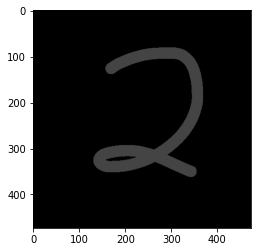

In [6]:
plt.imshow(image_tensor, cmap='Greys')

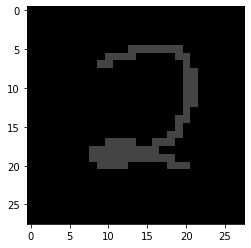

In [7]:
formatted_image = _format_image(image_tensor)

In [8]:
batch_input = np.expand_dims(formatted_image, axis=0)
confidences = model.predict(batch_input)
print(confidences)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
np.argmax(confidences)

2

In [3]:
tf.__version__

'2.2.0-rc3'